In [3]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import offsetbox
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [158]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500

In [4]:
word_vectors = KeyedVectors.load_word2vec_format(datapath('C:/Users/piotrek/Desktop/inf/nlp/lab1/repository/lab7/corpus'))

In [53]:
words = [
    ['sąd::noun', 'wysoki::adj'], ['trybunał::noun', 'konstytucyjny::adj'], ['kodeks_cywilny::noun'], ['kpk::noun'], ['sąd::noun', 'rejonowy::adj'],
    ['szkoda::noun'], ['wypadek::noun'], ['kolizja::noun'], ['szkoda_majątkowa::noun'], ['nieszczęście::noun'], ['rozwód::noun']]

for word in words:
    print('\n%s' % " ".join(word))
    result = word_vectors.most_similar_cosmul(positive=word)
    for i in range(5):
        print("  {}: {:.4f}".format(*result[i]))


sąd::noun wysoki::adj
  niski::adj: 0.7083
  sędzia::noun: 0.6617
  bowiem::conj: 0.6534
  zaś::conj: 0.6492
  ne#Mary_Ryan::noun: 0.6482

trybunał::noun konstytucyjny::adj
  władza_sądownicza::noun: 0.7756
  parlament::noun: 0.7530
  konstytucja::noun: 0.7485
  ne#Trybunału::noun: 0.7463
  bunałem::adj: 0.7457

kodeks_cywilny::noun
  ne#Kodeksu_cywilnego::noun: 0.9775
  ne#Kodeks_Cywilny::noun: 0.9429
  ne#Kodeksie_cywilnym::noun: 0.9301
  ne#Kodeksie_Cywilnym::noun: 0.9254
  ne#kodeksu_cywilnego::noun: 0.9237

kpk::noun
  ne#Kodeksu_postępowania_karnego::noun: 0.9331
  kpk::adj: 0.9309
  kpc::noun: 0.9268
  kk::noun: 0.9156
  ppsa::noun: 0.9147

sąd::noun rejonowy::adj
  sąd_okręgowy::noun: 0.7357
  trybunał::noun: 0.6992
  sąd_apelacyjny::noun: 0.6938
  asesoria::noun: 0.6905
  sąd_grodzki::noun: 0.6904

szkoda::noun
  wyrządzić::verb: 0.8782
  Krzywda::noun: 0.8758
  strata::noun: 0.8638
  nieszczęście::noun: 0.8634
  obawiać_się::verb: 0.8576

wypadek::noun
  przypadek::noun: 0.9

In [5]:
result = word_vectors.most_similar_cosmul(positive=['sąd::noun', 'konstytucja::noun'], negative=['kpc::noun'])
for i in range(10):
    print("  {}: {:.4f}".format(*result[i]))

  ne#Huntera_Peala::noun: 1.0294
  rząd::noun: 1.0257
  prezydent::noun: 1.0177
  trybunał::noun: 1.0076
  parlament::noun: 1.0031
  Partia::noun: 0.9985
  prawomyślność::noun: 0.9957
  ne#Franklina_D._Roosevelta::noun: 0.9940
  wybory::noun: 0.9918
  caudillo::noun: 0.9912


In [7]:
result = word_vectors.most_similar_cosmul(positive=['pasażer::noun', 'kobieta::noun'], negative=['mężczyzna::noun'])
for i in range(5):
    print("  {}: {:.4f}".format(*result[i]))

  podróżny::noun: 0.9133
  współpasażer::noun: 0.8872
  podróżujący::noun: 0.8702
  kierowca::noun: 0.8599
  turysta::noun: 0.8583


In [50]:
result = word_vectors.most_similar_cosmul(positive=['samochód::noun', 'rzeka::noun'], negative=['droga::noun'])
for i in range(10):
    print("  {}: {:.4f}".format(*result[i]))

  motorówka::noun: 0.9535
  ne#East_River::noun: 0.9291
  ne#Helensburgha::noun: 0.9278
  Łódź::noun: 0.9249
  łódka::noun: 0.9205


In [139]:
keys = list(filter(lambda word: 'noun' in word, word_vectors.__dict__['vocab'].keys()))[:1000] + ['szkoda::noun',
'strata::noun',
'uszczerbek::noun',
'szkoda_majątkowa::noun',
'uszczerbek::noun',
'krzywda::noun',
'niesprawiedliwość::noun',
'nieszczęście::noun']

In [134]:
word_vectors.vectors

array([[ 0.04166 ,  0.045049, -0.204449, ..., -0.029698, -0.107293,
        -0.03861 ],
       [-0.016454,  0.092963, -0.020773, ...,  0.184522, -0.094059,
        -0.072799],
       [-0.035822,  0.01965 , -0.024514, ...,  0.1034  , -0.053545,
        -0.000509],
       ...,
       [ 0.099041,  0.065883, -0.019852, ..., -0.030447,  0.097455,
         0.034036],
       [-0.005663, -0.029866, -0.031816, ..., -0.154893,  0.075719,
         0.007518],
       [ 0.068652,  0.170124, -0.069317, ...,  0.008587, -0.005068,
        -0.023537]], dtype=float32)

In [156]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(1000):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 fontdict={'weight': 0.01, 'size': 1})
    
    for i in range(1000, 1008):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color='red',
                 fontdict={'weight': 0.1, 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

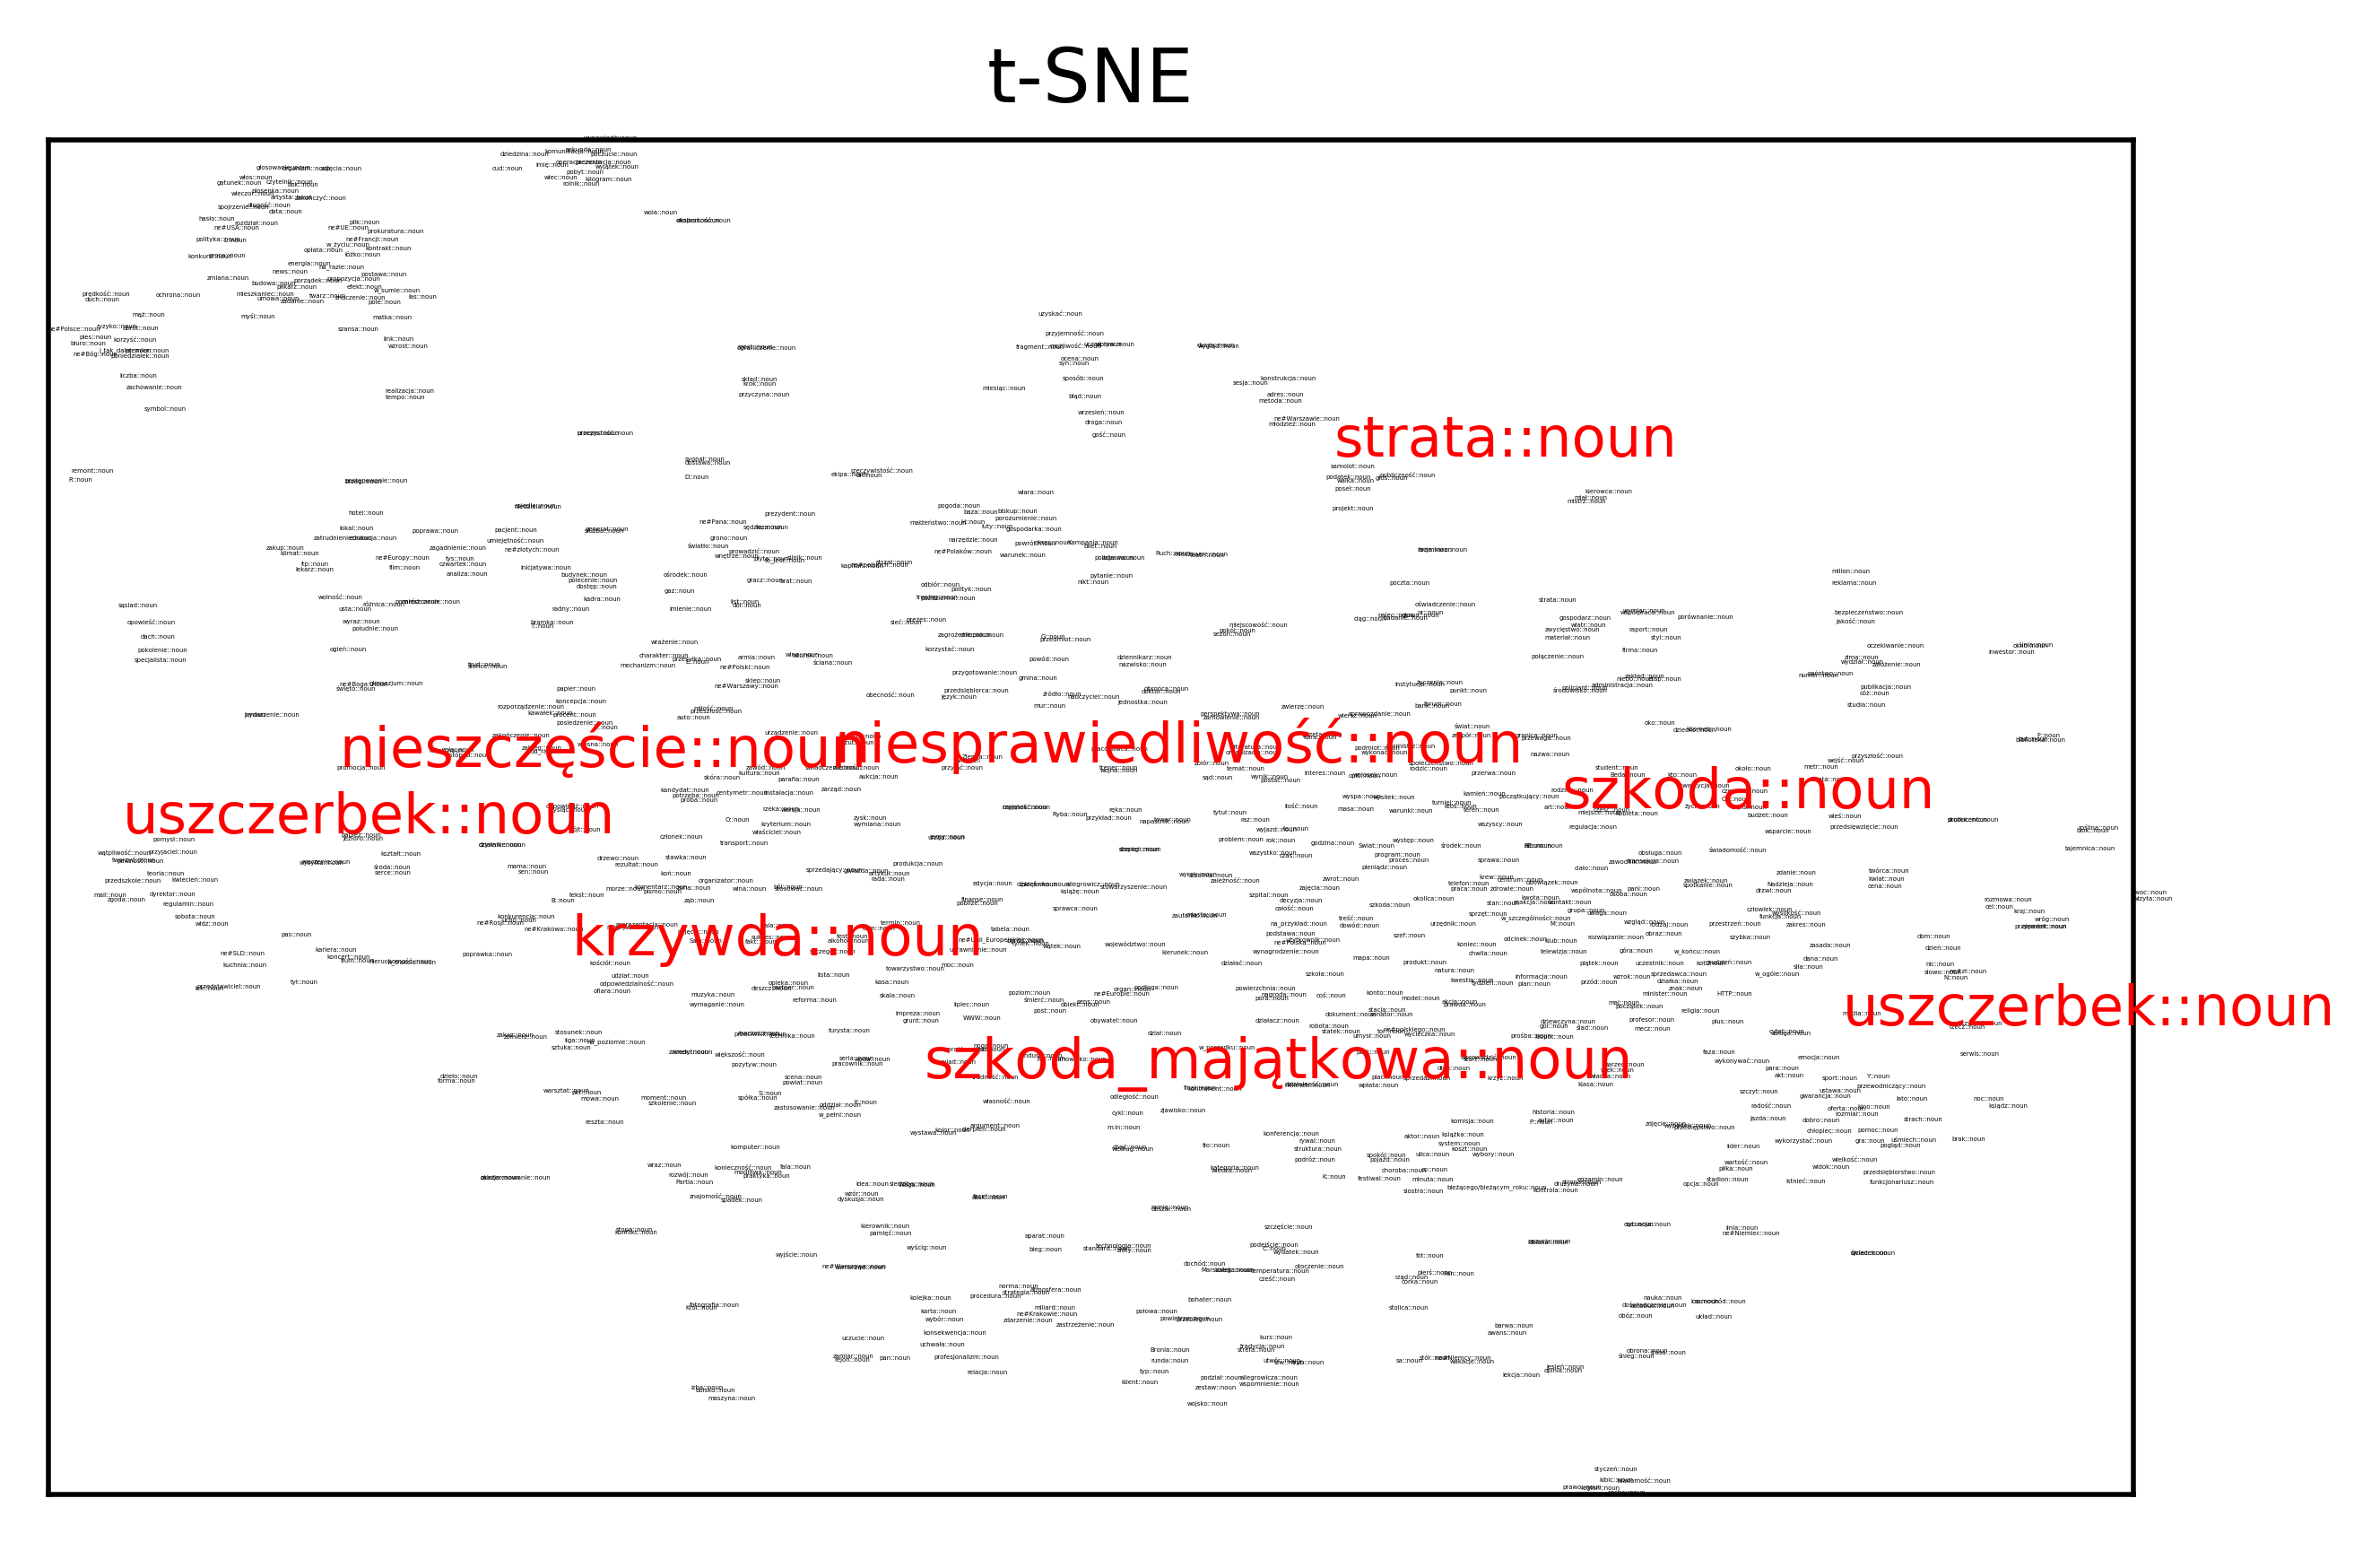

In [162]:
X = np.array([word_vectors.vectors[i] for i in range(len(keys))])
y = keys
tsne = manifold.TSNE(n_components=2,  method='exact')
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne, y,
               "t-SNE")

plt.show()

In [148]:
len(X_tsne[0])

2